<center><img src="https://matplotlib.org/_static/logo2.png" width=600 alt="Matplotlib Logo"></img></center>

# More Matplotlib

---
## Overview
We will cover creating more advanced plots with the Matplotlib library.

1. Create a histogram
1. Create a pie chart
1. Create and save an animated plot

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy basics](../numpy/numpy-basics) | Necessary | |
| [Matplotlib basics](./matplotlib) | Necessary | |

* **Time to Learn**: 30 minutes

---

## Imports

The same as before, we are going to import matplotlib's `pyplot` interface as `plt`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Histograms


To make a 1D histogram, we're going to generate a single vector of numbers.

We'll generate these numbers using numpy's normal distribution random number generator. For demonstration purposes, we've specified the random seed for reproducability.

In [2]:
npts = 2500
nbins = 15

# Generate random points from a normal distribution
np.random.seed(0)
x = np.random.normal(size=npts)

Finally, make a histogtam using `plt.hist`. Here, specifying `density=True` changes the y-axis to be probability instead of count. 

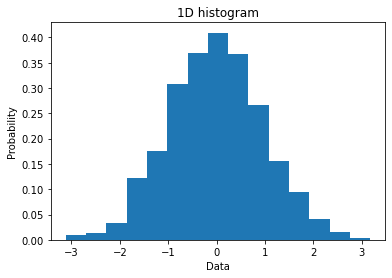

In [3]:
# Make histogram
plt.hist(x, bins=nbins, density=True)
plt.title('1D histogram')
plt.xlabel('Data')
plt.ylabel('Probability');

Similarly, we can make a 2D histrogram by generating a second random array and using `plt.hist2d`.

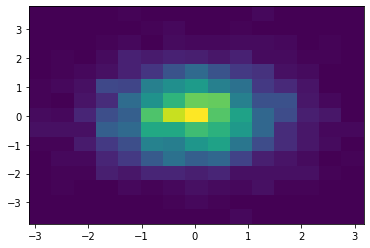

In [4]:
# Generate a second random array
y = np.random.normal(size=npts)

# Make a 2D histogram
plt.hist2d(x, y, bins=nbins);

## Pie Charts

Matplotlib can also be used to plot pie charts with `plt.pie`. The most basic implementation is shown below.

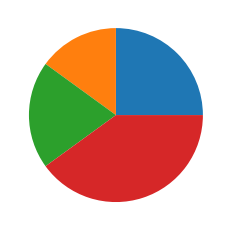

In [10]:
data = np.array([25, 15, 20, 40])
plt.pie(data);

Note that the data provided to the pie chart does not have to add up to 100. Any numbers provided will be normalized by default, although this can be turned off by setting `normalize=False`.

Let's do a more complicated example.

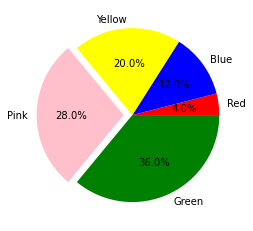

In [26]:
labels = ['Red', 'Blue', 'Yellow', 'Pink', 'Green']
sizes = [1, 3, 5, 7, 9]

# use explode to separate one slice from the rest
explode = (0, 0, 0, 0.1, 0)  # will separate the only the pink slice

# specify colors to match labels
colors = ['red', 'blue', 'yellow', 'pink', 'green']

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%');

## Animation

From matplotlib's animation interface, there are two basic tools, `FuncAnimation` and `T

In [29]:
from matplotlib.animation import FuncAnimation

### Geoscience Animation Example

For this section, we're going to roughly follow an example from the [GeoCAT-examples gallery](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html), [NCL_animate_1](https://geocat-examples.readthedocs.io/en/latest/gallery/Animations/NCL_animate_1.html#sphx-glr-gallery-animations-ncl-animate-1-py).

We're going to pull data from a repository called [geocat-datafiles](https://github.com/NCAR/geocat-datafiles). 

In [27]:
import cartopy.crs as ccrs
import geocat.datafiles as gdf
import xarray as xr

In [30]:
# Open a netCDF data file using xarray default engine and load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/meccatemp.cdf"), decode_times=False)

# Pull out surface temperature Dataarray from xarray Dataset
tas = ds.t